# Soal Ujian Module 2 Purwadhika

### 1. Import the libraries (pandas,numpy, matplotlib.pyplot, seaborn, math)

#### Use random.seed(101)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

np.random.seed(101)

### 2. Load Titanic Dataset from Seaborn and show the .head() of the dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Show the info of the dataframe using .info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 4. Describe the dataframe using .describe()

In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. Make Table like this to describe the dataframe

#### Columns Explanations :
 - __dataFeatures__ = column name
 - __dataType__ = data type of that column
 - __null__ = how many null data in that column/series
 - __nullPct__ = null percentage of total data in that column
 - __unique__ = how many unique data
 - __uniqueSample__ = get some unique sample from each column

#### hint : search .sample(), .drop_duplicates(), .values, .isna(), dtype

In [5]:
lis = []
for i in df.columns:
    lis.append([
                i, df[i].dtypes,df[i].isna().sum(),df[i].isna().sum()/len(df[i])*100,df[i].nunique(),
        [df[~pd.isnull(df[i])][i].unique()[0],df[~pd.isnull(df[i])][i].unique()[1]]
                ])
pd.DataFrame(data=lis, columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,survived,int64,0,0.000000,2,"[0, 1]"
1,pclass,int64,0,0.000000,3,"[3, 1]"
2,sex,object,0,0.000000,2,"[male, female]"
3,age,float64,177,19.865320,88,"[22.0, 38.0]"
4,sibsp,int64,0,0.000000,7,"[1, 0]"
5,parch,int64,0,0.000000,7,"[0, 1]"
6,fare,float64,0,0.000000,248,"[7.25, 71.2833]"
7,embarked,object,2,0.224467,3,"[S, C]"
8,class,category,0,0.000000,3,"[Third, First]"
9,who,object,0,0.000000,3,"[man, woman]"


### 6. Groupby

_Group By Sex (Mean)_

In [6]:
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


_Group By Sex (standard deviation)_

In [7]:
df.groupby('sex').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


_Group By Sex (Minimum value)_

In [8]:
df.groupby('sex').min()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,0,1,0.75,0,0,6.75,child,False,no,False
male,0,1,0.42,0,0,0.00,child,False,no,False


_Group By Sex (Maximum value)_

In [9]:
df.groupby('sex').max()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


_Group By Sex (Count)_

In [10]:
df.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


_Group By Sex (Describe Transpose)_

In [11]:
df.groupby('sex').describe().T

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [12]:
pjg = len(df[(df['class']=='First') | (df['class']=='Third')])
print('Jumlah Data : ' + str(pjg))

mn = df[((df['class']=='First') | (df['class']=='Third')) & (df['sex']=='male')]['age'].mean()
print('Mean Umur Pria : ' + str(mn))


df[(df['class']=='First') | (df['class']=='Third')][['sex','age']].head()

Jumlah Data : 707
Mean Umur Pria : 30.72271186440678


,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


#### Berapa total fare dari penumpang yang second class dan sendirian?

In [13]:
df[(df['class']=='Second') & (df['alone']==True)]['fare'].sum()

1462.875

### 8. Missing Values
#### Berapa banyak NaN age data dan mean dari setiap who?
#### Isi data NaN dari kolom age dengan mean dari umur tergantung whonya dia apa (child/woman/man)
#### Kemudian print banyak NaN age data dan mean umur setiap who lagi.

In [14]:
df[df['who']=='man']['age'].mean()

33.17312348668281

In [15]:
nman = sum(df[df['who']=='man']['age'].isnull())
manmean = df[df['who']=='man']['age'].mean()
nwoman = sum(df[df['who']=='woman']['age'].isnull())
womanmean = df[df['who']=='woman']['age'].mean()
nchild = sum(df[df['who']=='child']['age'].isnull())
childmean = df[df['who']=='child']['age'].mean()


print('Banyak Nan man & mean: ' + str(nman) + ' & ' + str(manmean))
print('Banyak Nan woman & mean: ' + str(nwoman) + ' & ' + str(womanmean))
print('Banyak Nan child & mean: ' + str(nchild) + ' & ' + str(childmean))

Banyak Nan man & mean: 124 & 33.17312348668281
Banyak Nan woman & mean: 53 & 32.0
Banyak Nan child & mean: 0 & 6.369518072289156


In [16]:
df.loc[df['who']=='man','age'] = df[df['who']=='man']['age'].fillna(manmean)
df.loc[df['who']=='woman','age'] = df[df['who']=='woman']['age'].fillna(womanmean)
df.loc[df['who']=='child','age'] = df[df['who']=='child']['age'].fillna(childmean)

In [17]:
nman = sum(df[df['who']=='man']['age'].isnull())
manmean = df[df['who']=='man']['age'].mean()
nwoman = sum(df[df['who']=='woman']['age'].isnull())
womanmean = df[df['who']=='woman']['age'].mean()
nchild = sum(df[df['who']=='child']['age'].isnull())
childmean = df[df['who']=='child']['age'].mean()

print('Banyak Nan man & mean: ' + str(nman) + ' & ' + str(manmean))
print('Banyak Nan woman & mean: ' + str(nwoman) + ' & ' + str(womanmean))
print('Banyak Nan child & mean: ' + str(nchild) + ' & ' + str(childmean))

Banyak Nan man & mean: 0 & 33.17312348668282
Banyak Nan woman & mean: 0 & 32.0
Banyak Nan child & mean: 0 & 6.369518072289156


#### Isi NaN embarked dan embark_town dan deck dengan modus masing2 (print modus masing2 juga)

In [18]:
print('Modus Embarked = ' + str(df['embarked'].mode()[0]))

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

Modus Embarked = S


In [19]:
print('Modus embark_town = ' + str(df['embark_town'].mode()[0]))

df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

Modus embark_town = Southampton


In [20]:
print('Modus deck = ' + str(df['deck'].mode()[0]))

df['deck'].fillna(df['deck'].mode()[0], inplace=True)

Modus deck = C


#### Last Print the dataframe info to check if there is still NaN values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null category
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 9. Adding New Features/Columns/Variables

#### Buat DataFrame baru dengan column2 sebagai berikut
 - __id__ = id table ini (PK)
 - __mean_fare__ = Mean Fare
 - __std_fare__ = Std Fare
 - __batas_min_fare__ = Mean Fare - (3 x Std Fare)
 - __batas_max_fare__ = Mean Fare + (3 x Std Fare)
 
#### Dan data2nya ada 3 (fare setiap class yaitu first, second, and third class)

In [22]:
klas = ['First', 'Second', 'Third']
print(klas)
dt = []
for i in range(3):
    dt.append([i+1, df[df['class']==klas[i]]['fare'].mean(), df[df['class']==klas[i]]['fare'].std(), 
               df[df['class']==klas[i]]['fare'].mean()-3*df[df['class']==klas[i]]['fare'].std(), 
               df[df['class']==klas[i]]['fare'].mean()+3*df[df['class']==klas[i]]['fare'].std()
              ])
df_new = pd.DataFrame(data=dt, columns=['id', 'mean_fare', 'std_fare', 'batas_min_fare', 'batas_max_fare'])
df_new

['First', 'Second', 'Third']


,id,mean_fare,std_fare,batas_min_fare,batas_max_fare
0,1,84.154687,78.380373,-150.986430,319.295805
1,2,20.662183,13.417399,-19.590013,60.914379
2,3,13.675550,11.778142,-21.658875,49.009975


#### Print outlier % of each class

In [23]:
out1 = sum((df[df['class']=='First']['fare']>df_new['batas_max_fare'][0]) | (df[df['class']=='First']['fare']<df_new['batas_min_fare'][0]))/len(df[df['class']=='First']['fare'])*100
out2 = sum((df[df['class']=='Second']['fare']>df_new['batas_max_fare'][1]) | (df[df['class']=='Second']['fare']<df_new['batas_min_fare'][1]))/len(df[df['class']=='Second']['fare'])*100
out3 = sum((df[df['class']=='Third']['fare']>df_new['batas_max_fare'][2]) | (df[df['class']=='Third']['fare']<df_new['batas_min_fare'][2]))/len(df[df['class']=='Third']['fare'])*100

print('Outlier % First : ' + str(out1))
print('Outlier % Second : ' + str(out2))
print('Outlier % Third : ' + str(out3))



Outlier % First : 1.3888888888888888
Outlier % Second : 3.804347826086957
Outlier % Third : 2.8513238289205702


#### Tambahkan column outliercalcId (FK) di dfTitanic

In [24]:
dct = {
    'First' : '1',
    'Second': '2',
    'Third' : '3'
}

dfout = []
for i in df['class']:
    dfout.append(dct[i])

df['outliercalcId'] = dfout

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [26]:
df['outliercalcId'].value_counts()

3    491
1    216
2    184
Name: outliercalcId, dtype: int64

#### Tambahkan column outlier (1 for yes and 0 for no)

In [27]:
df['outlier'] = np.nan
df.loc[df['class']=='First','outlier'] = (df[df['class']=='First']['fare']>df_new['batas_max_fare'][0]) | (df[df['class']=='First']['fare']<df_new['batas_min_fare'][0])
df.loc[df['class']=='Second','outlier'] = (df[df['class']=='Second']['fare']>df_new['batas_max_fare'][1]) | (df[df['class']=='Second']['fare']<df_new['batas_min_fare'][1])
df.loc[df['class']=='Third','outlier'] = (df[df['class']=='Third']['fare']>df_new['batas_max_fare'][2]) | (df[df['class']=='Third']['fare']<df_new['batas_min_fare'][2])

for i in range(len(df['outlier'])):
    if df['outlier'][i] == True:
        df.loc[i,'outlier'] = 1
    else:
        df.loc[i,'outlier'] = 0


In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId,outlier
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,0


In [29]:
df['outlier'].value_counts()

0    867
1     24
Name: outlier, dtype: int64

### 10. Export both dataFrames to csv (Titanic.csv, TitanicOutCalc.csv)

In [30]:
df.to_csv('Titanic.csv', index=False)
df_new.to_csv('TitanicOutCalc.csv', index=False)

### 11. Buatlah plot2 dibawah menggunakan seaborn

#### a. Heatmap dari correlation dfTitanic (color=coolwarm, plt.figure(figsize=(10,5))

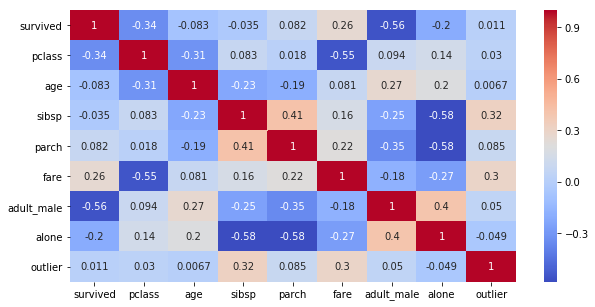

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)

#### b. buatlah countplot seperti dibawah (style=whitegrid, palette=rainbow)

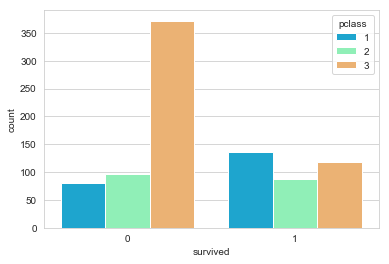

In [32]:
sns.set_style('whitegrid')
sns.countplot(df['survived'], hue=df['pclass'], palette='rainbow')

#### c. buatlah histogram age dibawah (color=darkred,bins=30)

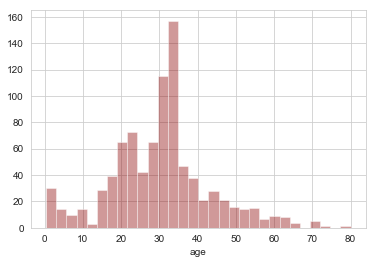

In [33]:
sns.distplot(df['age'], color='darkred', bins=30, kde=False)

# Goodluck Guys!! Salam Bertasbih!